# Investigate a data set with Python - Titanic

In order to analyze a data set the steps to be followe are:
#Question
#Wrangle / Data cleaning
#Explore / find patterns
#Draw conclusions
#Communicate

I have chosen to analyze the Titanic Data set that contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The Kaggle website gives facts about the disaster:
1502 out of 2224 where killed

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Some children travelled only with a nanny, therefore parch=0 for them.

# Questions

It will be interesting to see:

Stats and graphics about the passengers who embarqued:

1. What is the survival rate for a passenger with regards to the following factors?

    1.1.Age

    1.2.Passenger clas(class1/2/3). By the way - crusing with the Titanic comes in cheap or not? It will be interesting to see how much had a passenger paied  for a ticket within its passenger class.

    1.3.Sex (woman/man)
    1.4.Family onboard (with or witjhout siblings and familiy)

2. What is the survival rate of 
distinct age groups
sample size
population size


3. Do men or women have a higher probability of survival?



In [1]:
# Imports
#CSV
#import unicodecsv
#import csv

# pandas
import pandas as pd
#from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# upload the titanic data set and convert to a DataFrame using pandas
titanic_df = pd.read_csv("titanic-data.csv")
# preview the data - only the first 5 lines
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Wrangle / Data cleaning
In order to answer the questions posed above I will only need part of the data so I will exclude the Name, Ticket, Cabin and Embarked.
These columns will be excluded due to the fact that they are not useful for answering the questions posed for this study. Neither the name of the passenger, ticket number , cabin where he/she stayed or the port of where they embarked will have any relevance for the questions posed.

In [3]:
#delete the columns not needed in the analisys and check by displaying header again
titanic_df = titanic_df.drop(['Name','Ticket','Cabin', 'Embarked'], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


It is important to check the consitency of the data, meaning to see if we have missing data and what is the data formant for each column. This will be especially valuable for further calculation.

In [4]:
#data overview
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


We observe that there are missing values in the remaining dataset. To be more exact 177 passengers do not have the Age registered.By “missing” we simply mean null or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. in our case these values where not collected because the passengers existed. As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. NaN is the default missing value marker for reasons of computational speed and convenience. The function .isnull() will show how many values are in that situation.
In his study I will not replace the missing values due to the fact that it can alter my conclusions instead i will use functions that do not take in account the NaN values.
The descriptive statistics and computational methods are all written to account for missing data. 
For example:
•When summing data, NA (missing) values will be treated as zero
•If the data are all NA, the result will be NA
•Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays
NA groups in GroupBy are automatically excluded. 

# Explore / Find patterns
Age is the variable that will be analyzed first therefore we will start with the simple stats and a histogram moving further to group it by different variable and visualize it in different ways

In [5]:
# get average, std, and number of NaN values in titanic_df as is the only variable with missing data
average_age_titanic   = titanic_df['Age'].mean()
max_age_titanic       = titanic_df['Age'].max()
min_age_titanic       = titanic_df['Age'].min()
count_nan_age_titanic = titanic_df['Age'].isnull().sum()
print average_age_titanic
print max_age_titanic
print min_age_titanic
print count_nan_age_titanic

29.6991176471
80.0
0.42
177


In order to answer the first two questions we will start by exploring the age variable (factor)
Having a distribution of the age will help us better understand what age population we have onboad and which is more predominant.

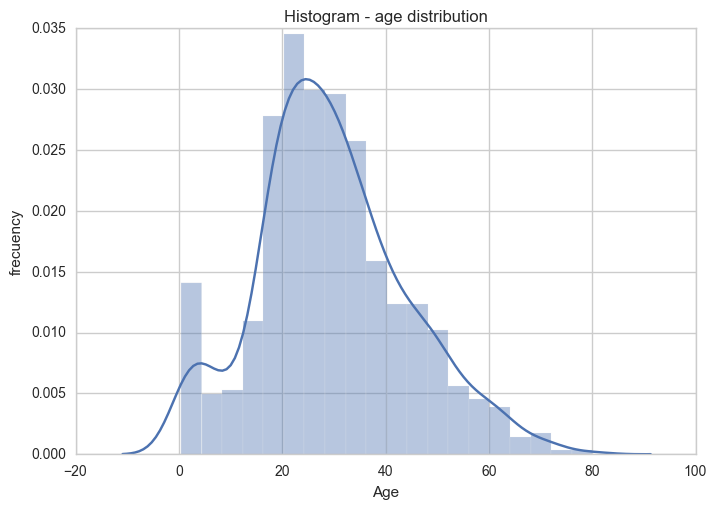

In [6]:
#plot histogram of age variable with seaborn
histogram_age = sns.distplot(a=titanic_df['Age'].dropna(), bins=20)
histogram_age.set(title='Histogram - age distribution', xlabel='Age', ylabel='frecuency')
plt.show()

The histograms shows a distributions skewed to the left. Even so, the population aboard is mostry betewwn 20 and 40 years old.

In order to treat data easly I decided to group the age variable was into several categories that are arbitrary. Generally in Europe and Adult is consider if it has over 18 years, in USA if it has over 21 years old. As the oldest passenger is 80 years for the sake of simetry I made groups the following way:
Young between 0 and 20 years old
Aldult between 20 and 40 years old
Odl between 40 and 80 years old.

In [7]:
#group the Passengers by age groups in order to see which age had a higher survival
#define bins for the Age variable

bins =[0, 20, 40, 80]
#create group names
group_names = ['Young', 'Adult', 'Old']
#define a new column with Age Bins
titanic_df['Age_Bins'] = pd.cut(titanic_df['Age'], bins, labels=group_names)
#display the new result with the additional column
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Bins
0,1,0,3,male,22.0,1,0,7.2500,Adult
1,2,1,1,female,38.0,1,0,71.2833,Adult
2,3,1,3,female,26.0,0,0,7.9250,Adult
3,4,1,1,female,35.0,1,0,53.1000,Adult
4,5,0,3,male,35.0,0,0,8.0500,Adult


In [8]:
#group variable Age Bins by Survived
survived_by_age_bins = titanic_df.groupby('Age_Bins')[['Survived']].sum()
survived_by_age_bins.rename(columns={'Survived': 'Passengers'}, inplace=True)
print survived_by_age_bins

          Passengers
Age_Bins            
Young             82
Adult            153
Old               55


In [9]:
#group variable Age Bins by PassengerId to chek the total number for each Age_bins
passengers_by_age_bins = titanic_df.groupby('Age_Bins')[['PassengerId']].count()
passengers_by_age_bins.rename(columns={'PassengerId': 'Passengers'}, inplace=True)
print passengers_by_age_bins
passengers_by_age_bins.info()

          Passengers
Age_Bins            
Young            179
Adult            385
Old              150
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 3 entries, Young to Old
Data columns (total 1 columns):
Passengers    3 non-null int64
dtypes: int64(1)
memory usage: 51.0 bytes


In [10]:
survival_normalized_by_age_bins = survived_by_age_bins/passengers_by_age_bins
print survival_normalized_by_age_bins

          Passengers
Age_Bins            
Young       0.458101
Adult       0.397403
Old         0.366667


In [11]:
#calculate percentage of survival with all titanic
titanic_survival = 1502. / 2224.
print titanic_survival

0.67535971223


In [12]:
#calculate percentage of survival within the sample

P = titanic_df['PassengerId'].count()
S = titanic_df['Survived'].sum()

titanic_survival_sample = 1.0*S/P

print P
print S
print titanic_survival_sample

891
342
0.383838383838


In order to answer the second question we will calculate the survival of the whole sample provided and the total population ( data obtained from the kaggle website https://www.kaggle.com/c/titanic). The other calculation by age groups we have obtained earlier. I want to know if a 45% rate of the Young population is lower or higher % of survival than the sample and population. In order to try other types of graphics rather than the bar ones I will use a line plot.

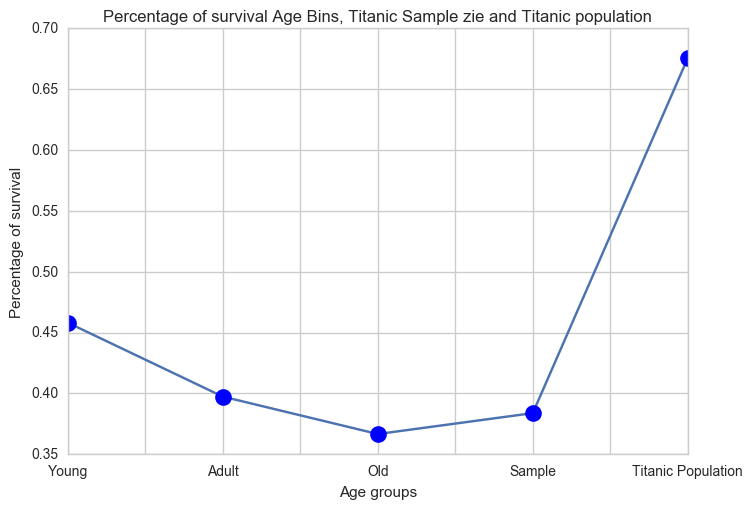

In [13]:
#define two np arrays with the values calculated above
percentage_of_survived_labels = np.array(['Young', '','Adult','', 'Old','', 'Sample','', 'Titanic Population'])
percentage_of_survived_data = np.array([0.458101, 0.397403, 0.366667, 0.383838383838, 0.67535971223])

#plot np arrays
fig, ax = plt.subplots()
plt.plot(percentage_of_survived_data, marker='o',markerfacecolor='blue', markersize=12)

# Draw the canvas, in order for the labels won'tto be positioned and assign labels from np arrray
fig.canvas.draw()
ax.set_xticklabels(percentage_of_survived_labels)
plt.title('Percentage of survival Age Bins, Titanic Sample zie and Titanic population')
ax.set_xlabel("Age groups")
ax.set_ylabel("Percentage of survival")
plt.show()
                            

# Draw conclusions
For the data set we can observed that the Young (male and females between the age of 0 and 20 years old) have a higher survival percentage than the other age groups (Adult, Old). This percentage is higher than the one of the sample size and lower than the one of the population.
A statistical test (Chi2 or 2-Proportion test - if we had only two groups) will be appropiate to validate that from a statistical point of viwew the percentages are significantlly different.

Crusing with the Titanic - cheap or not? the next bar chart will answer to this question.

            Fare
Pclass          
1       512.3292
2        73.5000
3        69.5500


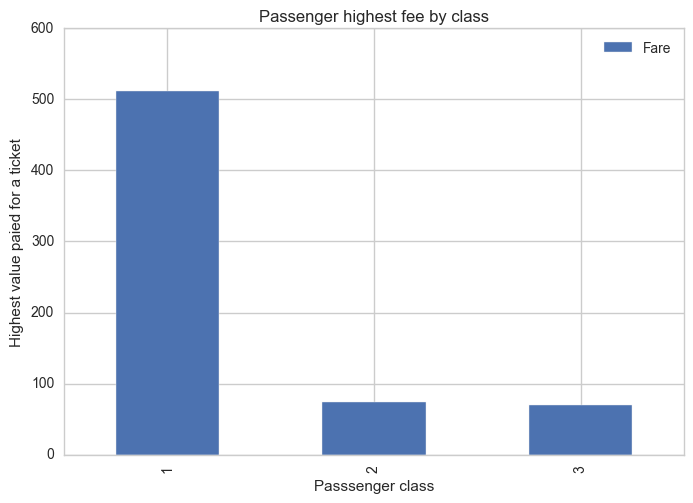

In [14]:
#in the new data frame group the Pclass by fare
#plot maximum cost per passenger class

titanic_df_pass_fare_grouped = titanic_df.groupby('Pclass')[['Fare']].max()

print titanic_df_pass_fare_grouped
plot_ticket = titanic_df_pass_fare_grouped.plot.bar()
plt.title('Passenger highest fee by class')
plot_ticket.set_xlabel("Passsenger class")
plot_ticket.set_ylabel("Highest value paied for a ticket")
plt.show()

The bar graph shows that the highest fare was paied by the passengers in 1 class. The maximum tarif was 512.

Ok. So if you cruised within the titanic you paied good money in the 1st class, but let's find out who paied more money. Men or women.

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
445          446         1       1    male   4.0      0      2   81.8583   
310          311         1       1  female  24.0      0      0   83.1583   
309          310         1       1  female  30.0      0      0   56.9292   
307          308         1       1  female  17.0      1      0  108.9000   
306          307         1       1  female   NaN      0      0  110.8833   

    Age_Bins  
445    Young  
310    Adult  
309    Adult  
307    Young  
306      NaN  


(0, 260)

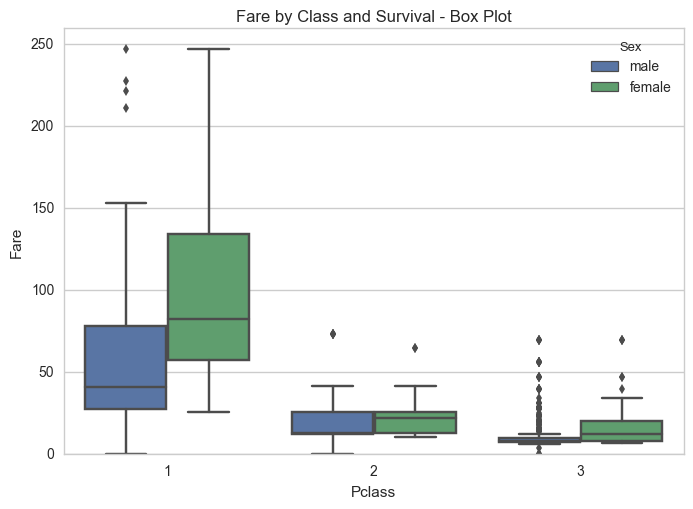

In [15]:
#create new data frame wit sorted values column Fare by Passenger clas
titanic_df_pass_fare = titanic_df.dropna(subset = ['Fare']).sort_values('Pclass')
print titanic_df_pass_fare.head()
#plot boxplot by the cost by passenger class and evidentiate survival by each class and fare cost
plotPF = sns.boxplot(data = titanic_df_pass_fare, x='Pclass', y='Fare', hue='Sex')
plotPF.set(title='Fare by Class and Survival - Box Plot', xlabel='Pclass')
plotPF.set_ylim([0,260])

The boxplot shows that the median value of the fare paied by the females is higher than the one paied by the men. Therefore more women in the first clas paied more for a fist class ticket.

Now let us see now how does the passenger class influences the survival rate.

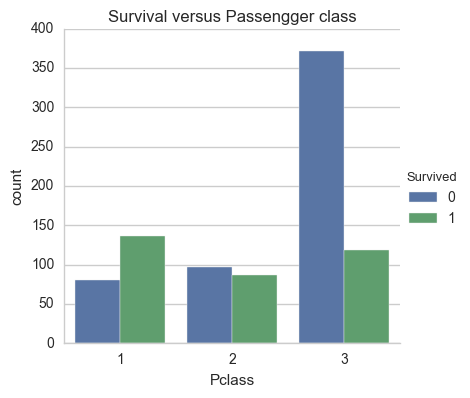

In [16]:
#plot Passenger class and survival
sns.factorplot('Pclass', data=titanic_df, hue='Survived', kind='count')
sns.plt.title('Survival versus Passengger class')

The bar chart shows that more people survived in the first class that the other classes.

In [17]:
#group variable Pclass by Survived
survived_by_class = titanic_df.groupby('Pclass')[['Survived']].sum()
survived_by_class.rename(columns={'Survived': 'Passengers'}, inplace=True)
print survived_by_class
#group variable Pclass by PassengerId to chek the total number for each Age_bins
passengers_by_class_all = titanic_df.groupby('Pclass')[['PassengerId']].count()
passengers_by_class_all.rename(columns={'PassengerId': 'Passengers'}, inplace=True)
print passengers_by_class_all
passengers_by_age_bins.info()
survival_normalized_by_class = survived_by_class/passengers_by_class_all
print survival_normalized_by_class

        Passengers
Pclass            
1              136
2               87
3              119
        Passengers
Pclass            
1              216
2              184
3              491
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 3 entries, Young to Old
Data columns (total 1 columns):
Passengers    3 non-null int64
dtypes: int64(1)
memory usage: 51.0 bytes
        Passengers
Pclass            
1         0.629630
2         0.472826
3         0.242363


# Draw conclusions
The median value  and 50% percentile of the fare cost is larger in the first class for the females. So if you where a female in the first class you will ave probably paied more than a man.
The survival in rate is higher in the 1st class Passenger and lower in the 3rd class passengers.

Earlyer we have seen the survival rates among different age groups. Let's explore that graphically. A boxplot will help us identify if 50% of the age group population has a higher survival rate. We bassically expect the box to be larger on the "Survived" side of the graphic.

[<matplotlib.text.Text at 0xcb97208>, <matplotlib.text.Text at 0xcb7ed68>]

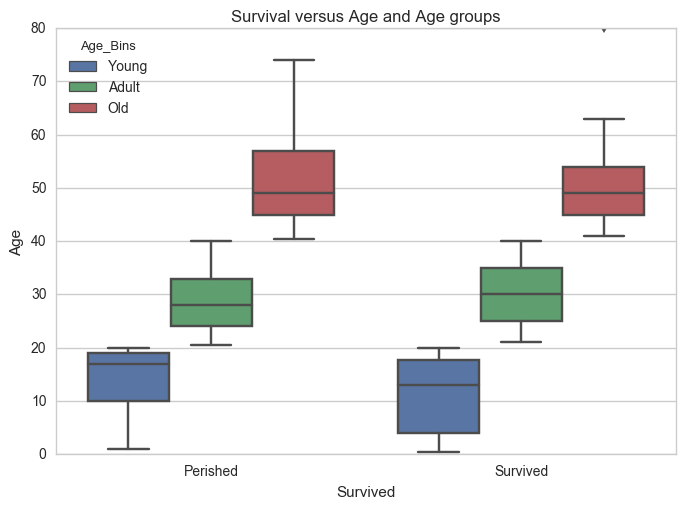

In [18]:
#create new data frame wit sorted values column Age by Survival
titanic_df_age_sex_graph = titanic_df.dropna(subset = ['Age']).sort_values('Survived')
#create plot with survival by age bins
ax = sns.boxplot(x="Survived", y="Age", data=titanic_df_age_sex_graph, hue='Age_Bins')
sns.plt.title('Survival versus Age and Age groups')
ax.set_xticklabels(['Perished', 'Survived'])

The boxplot above shows that the Young survived more that the Old.

As histograms give useful information about the distribution of the population I have proposed myself to try another type of visualization in order to see how can I plot the distribution of the age (by sex) instead in two histograms with the violin plot. This will help us understand visually how many people are in each group and what their age is. As we said earlier that the Young have a higher survival rate, let's see if there are visually equally distributed.

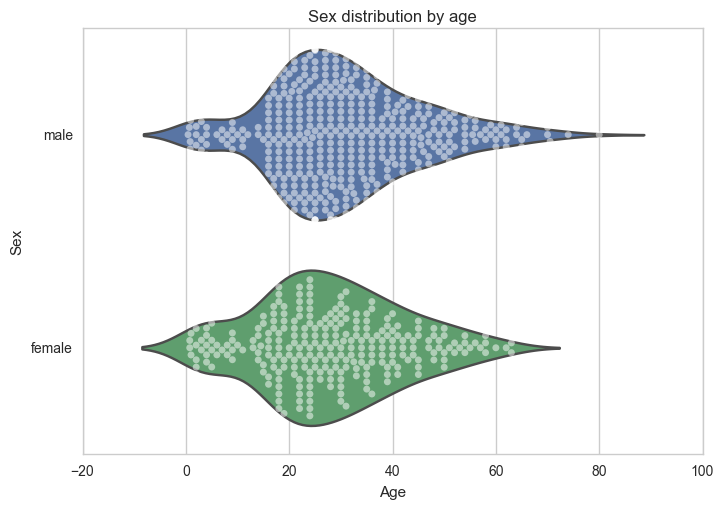

In [19]:
#create plot with Age and Sex columns in order to see distribution of ages per sex
sns.violinplot(x="Age", y="Sex", data=titanic_df_age_sex_graph, inner=None)
sns.swarmplot(x="Age", y="Sex", data=titanic_df_age_sex_graph, color="w", alpha=.5);
sns.plt.title('Sex distribution by age')

The violin plot shows that the age distribution is similar for men and women.

Let's explore now if men either women have a higher survival rate. A bar plot will do the job and show how may men and women where and how many survived.

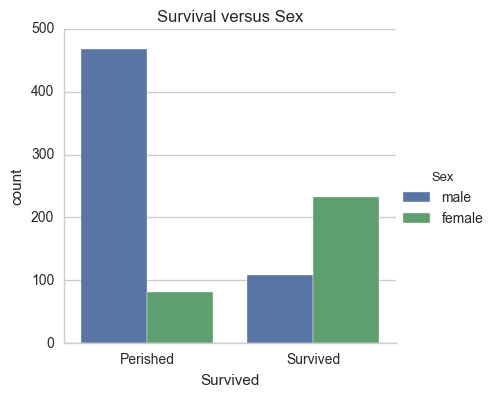

In [20]:
#plot sex and survival
plot1 = sns.factorplot('Survived', data=titanic_df, hue='Sex', kind='count',hue_order=['male','female'])
sns.plt.title('Survival versus Sex')
plot1.set_xticklabels(['Perished', 'Survived'])

# Draw conclusions
Allthough there where more men abord, the females had a higher survival in the sample analyzed.

Now that we are left with only more variable to analyze: people with family on board had a higher survival rate or not?
For that reason we will do a bar plot with the combined cells (SibSp and Parch) reflect number of family members on board.

In [21]:
#Define new column in the data frame that sums two columns
#SibSp and Parch in order to see whitch passengers are on board with a relative and which not

titanic_df["family_on_board"]=titanic_df["SibSp"]+titanic_df["Parch"]

display(titanic_df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Bins,family_on_board
0,1,0,3,male,22.0,1,0,7.2500,Adult,1
1,2,1,1,female,38.0,1,0,71.2833,Adult,1
2,3,1,3,female,26.0,0,0,7.9250,Adult,0
3,4,1,1,female,35.0,1,0,53.1000,Adult,1
4,5,0,3,male,35.0,0,0,8.0500,Adult,0


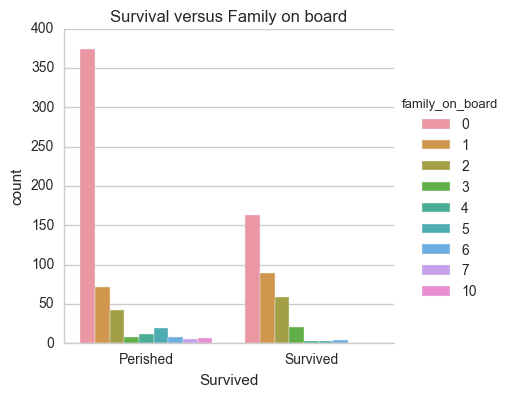

In [22]:
#plot sex and survival
plot2 = sns.factorplot('Survived', data=titanic_df, hue='family_on_board', kind='count')
sns.plt.title('Survival versus Family on board')
plot2.set_xticklabels(['Perished', 'Survived'])

The graphic above shows that the more family a person had onboard it was more likely to survive. The graphic will be more intuitive we group binary (with family 6 without family)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Bins,family_on_board,family_YN
0,1,0,3,male,22.0,1,0,7.2500,Adult,1,0
1,2,1,1,female,38.0,1,0,71.2833,Adult,1,0
2,3,1,3,female,26.0,0,0,7.9250,Adult,0,0
3,4,1,1,female,35.0,1,0,53.1000,Adult,1,0
4,5,0,3,male,35.0,0,0,8.0500,Adult,0,0


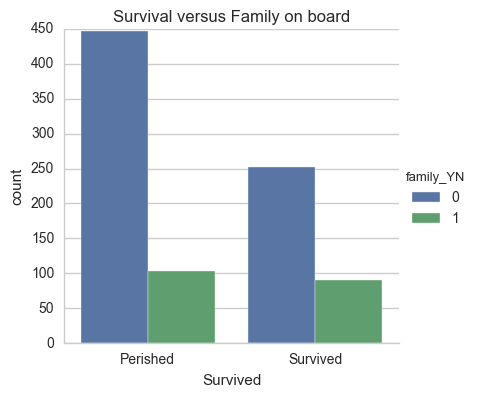

In [23]:
#append a new column to the data frame based on the number of family members on board. 
#If more than one member insert 1 and if none insert 0.
titanic_df['family_YN'] = np.where(titanic_df['family_on_board']<= 1, 0, 1)
display(titanic_df.head())
#plot sex and survival
plot3 = sns.factorplot('Survived', data=titanic_df, hue='family_YN', kind='count')
#add title to the plot
sns.plt.title('Survival versus Family on board')
plot3.set_xticklabels(['Perished', 'Survived'])

The bar graph shows that almost all passenger with falily survived and ony partly the ones without family.

# Communicate
Within this data set the young females (between 0 and 20 years old) that is a 1st class passenger with family on board had a higher rate of survival.

#Study limitations:
The dataset analyzed has missing values for the Age variable. These missing values where omitted sue to the fact that the functions used missing values properly (e.g the mean value of the Age will be calculated dividing only to the cells that have a value). In my opinion this presents a positive aspect meaning the study will not be shifted a biased dirrection. This has also a negative aspoect. If we where to have the 177 missing value it is possible for the study to have had a different result in terms of age.
The larger and more complete the sample is the more accurate the result will be. We do not know if the sample is representative of the population so as I said above in the conclusions the study result is based only on the avalilable data and it has not been extrapolated.

In terms of other variables not included in the dataset it could have been useful in the analysis to have more details about the family itself ( I have seen studies where they group by family name, but that might be inaccurate; in Spain the spouses do not have the same family name, only the kids and it might be the case of a common family name that is repeated and we might think they are related). Personally I would have found interesting to have had the persons grouped by family and to have the data for all population 2224 persons aboard.

The statements here are merely facts and do not imply causation. 

# External Sources
https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
http://seaborn.pydata.org/index.html
http://matplotlib.org/
http://www.numpy.org/
http://stackoverflow.com/
http://pandas.pydata.org
http://pandas.pydata.org/pandas-docs/stable/missing_data.html
http://chrisalbon.com/python/pandas_binning_data.html